#### Computing AP per species and iterations & Plot

In [1]:
import pandas as pd
from sklearn.metrics import average_precision_score

* First we will compute the AP per class and iterations and put them into a single Dataframe

In [3]:
def compute_ap_per_class(df_gt, model_outputs, model_names):
    """
    Compute AP per class per model iteration.

    Parameters:
        df_gt (pd.DataFrame): Ground truth DataFrame with binary labels.
        model_outputs (list of pd.DataFrame): List of predicted scores DataFrames.
        iteration_names (list of str): List of iteration names (e.g., ['iteration-1', 'iteration-2']).

    Returns:
        pd.DataFrame: A DataFrame with one row per class and columns 'class', 'AP_iteration-X', ...
    """
    owl_classes = df_gt.columns[3:]  # Assuming first 3 columns are file/start/end
    ap_data = {'class': owl_classes}

    for df_model, model in zip(model_outputs, model_names):
        ap_scores = []
        for owl_class in owl_classes:
            y_true = df_gt[owl_class].values
            y_score = df_model[owl_class].values
            try:
                ap = average_precision_score(y_true, y_score)
            except ValueError:
                ap = float('nan')  # handle rare edge cases (e.g., class not present)
            ap_scores.append(ap)
        ap_data[f'{model}'] = ap_scores

    return pd.DataFrame(ap_data)



In [8]:
# Example usage:
df_gt = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/input_ready/one-hot-encoded_validation_Owls.csv')
df_BN = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/BN_model_s1_t0.01/bn_predicted_labels_Owls.csv')
df_model0 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_0_0129_s1_t0.01/model0_predicted_labels_Owls.csv')
df_model1 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_1_0218/m1_predicted_labels_Owls.csv')
df_model2 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_2_0311/m2_predicted_labels_Owls.csv')
df_model3 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_3_strong-neg_0331/m3_strong-neg_predicted_labels_Owls.csv')
df_model4 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_4_04282025/m4_predicted_labels_Owls.csv')
df_model5 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_5_05232025/m5_predicted_labels_Owls.csv')
df_model6 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_6_05272025/m6_predicted_labels_Owls.csv')
df_model7 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_7_05302025/m7_predicted_labels_Owls.csv')
df_model8 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_8_06072025/m8_predicted_labels_Owls.csv')
df_model9 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_9_old-params_06132025/m9_old-params_predicted_labels_Owls.csv')
df_model9_autotune = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_9_06102025/m9_predicted_labels_Owls.csv')
ap_df = compute_ap_per_class(df_gt, [df_BN, df_model0, df_model1, df_model2, df_model3, df_model4, df_model5, df_model6, df_model7, df_model8, df_model9, df_model9_autotune], ['BN', 'M0', 'M1', 'M2', 'M3', 'M4','M5','M6', 'M7', 'M8', 'M9', 'M9_autotune'])
ap_df.to_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/ap_results.csv', index=False)

* Now we will plot the data creating a single plot per class

In [9]:
# First we have to reorder the data in a long format in order to plot.

# Assuming `ap_df` is your wide-format DataFrame from earlier
ap_long = ap_df.melt(id_vars='class', 
                     var_name='model', 
                     value_name='AP')

# Optional: clean up the 'iteration' column to remove the 'AP_' prefix
#ap_long['model'] = ap_long['model'].str.replace('AP_', '')


In [10]:
color = {
    'Buff-fronted Owl': 'firebrick',
    'Striped Owl_call': 'darkgoldenrod',
    'Striped Owl_song': 'goldenrod',
    'Stygian Owl_call': 'olivedrab',
    'Stygian Owl_song': 'yellowgreen',
    'Burrowing Owl_call':'turquoise',
    'Burrowing Owl_song': 'lightseagreen',
    'Black-banded Owl': 'darkorange',
    'Mottled Owl_call': 'plum',
    'Mottled Owl_song': 'violet',
    'Ferruginous Pygmy-Owl': 'mediumslateblue',
    'Black-capped Screech-Owl': 'limegreen',
    'Tropical Screech-Owl': 'forestgreen',
    'Long-tufted Screech-Owl': 'olive',
    'Tawny-browed Owl': 'cornflowerblue',
    'Rusty-barred Owl_call': 'mediumvioletred',
    'Rusty-barred Owl_call1': 'deeppink',
    'Rusty-barred Owl_song': 'hotpink',
    'Barn Owl': 'teal'
}

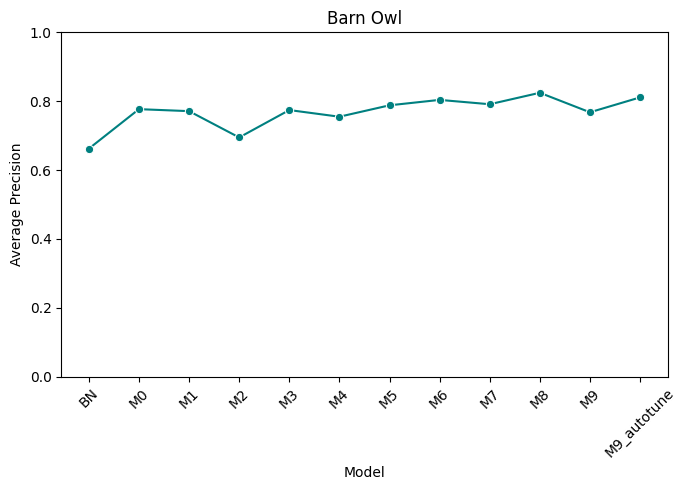

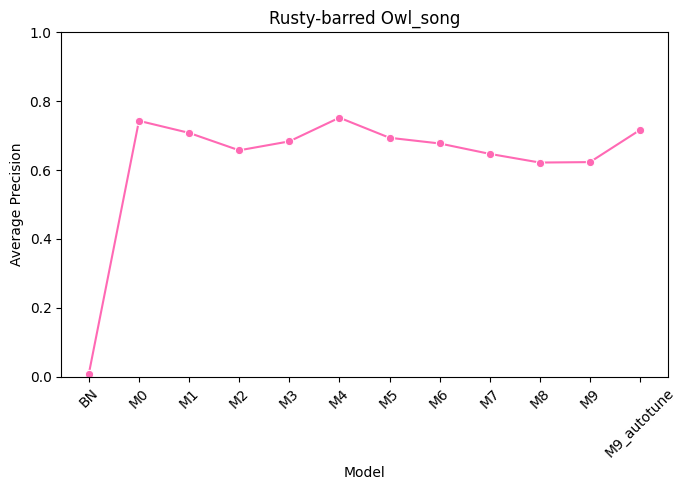

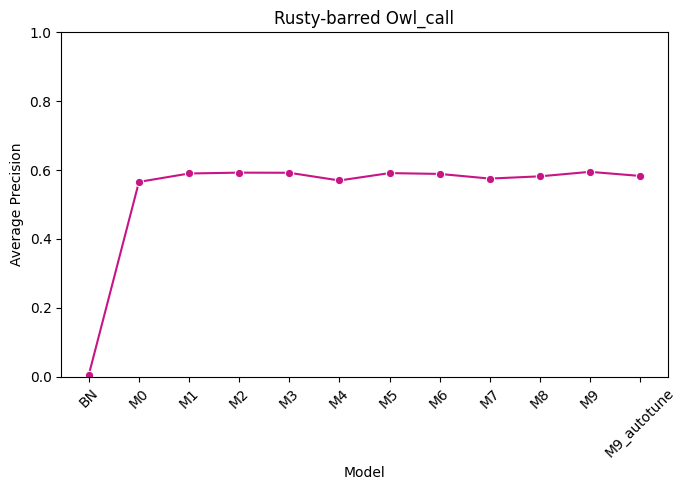

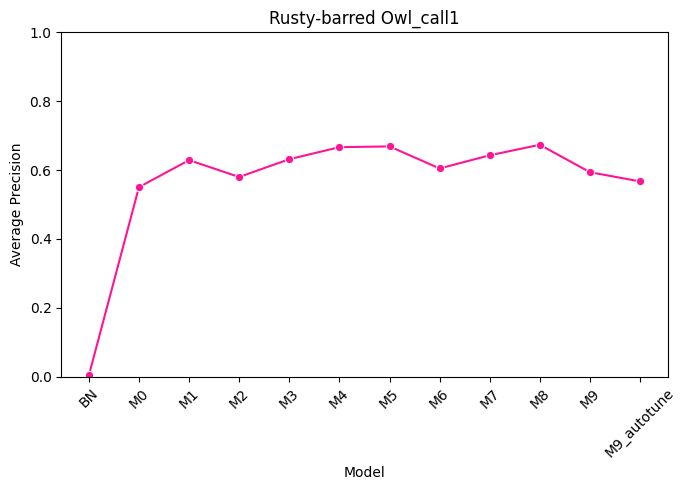

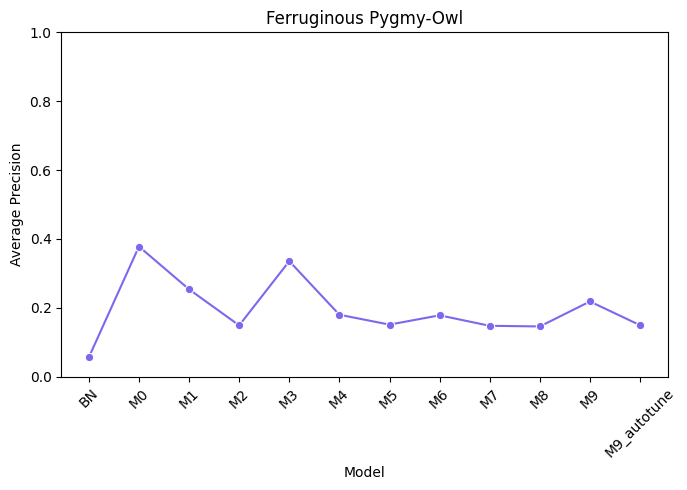

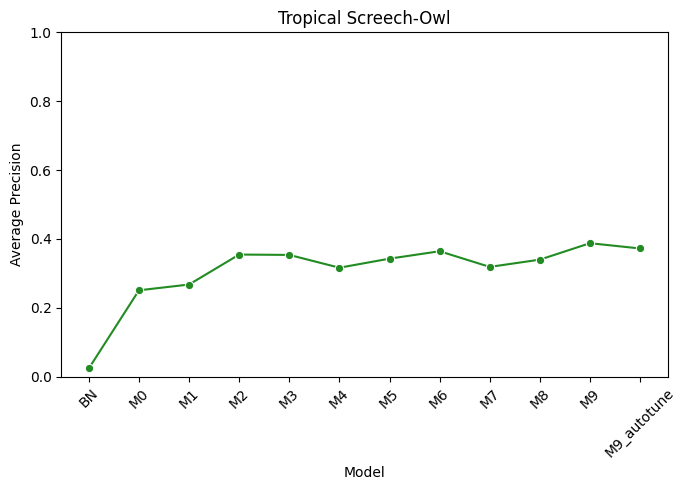

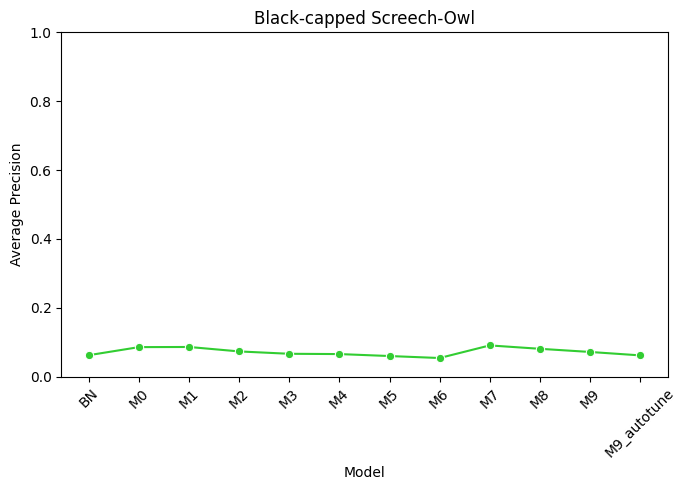

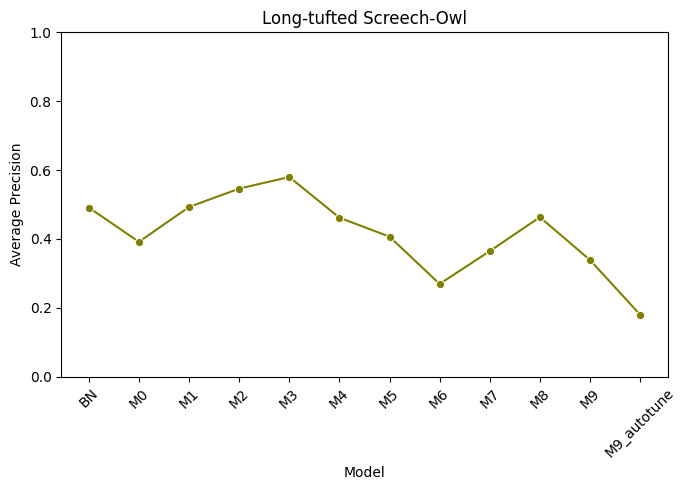

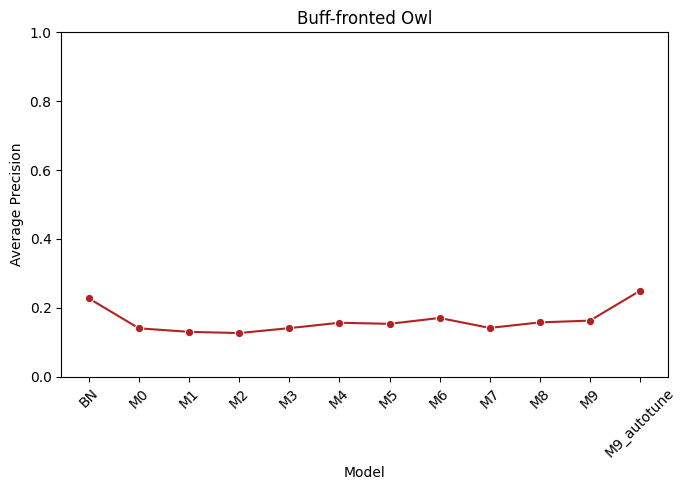

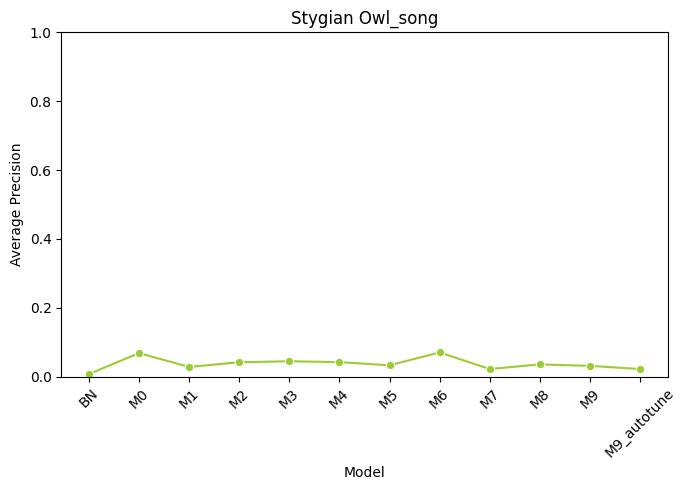

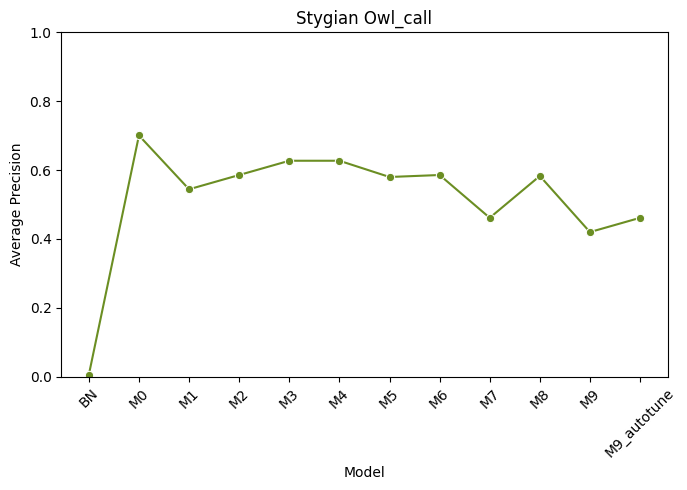

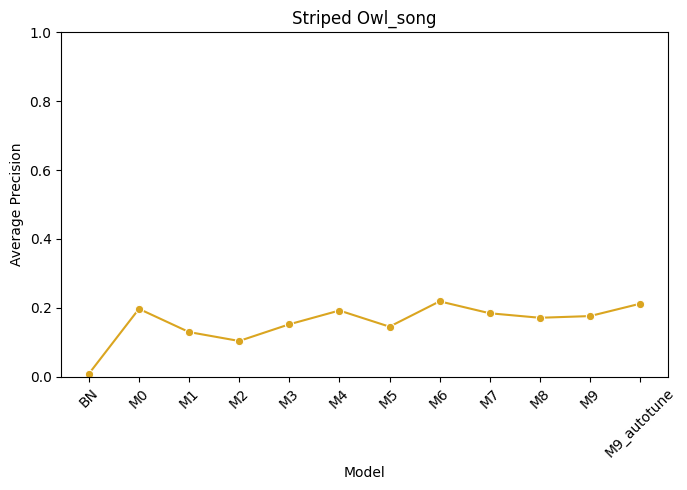

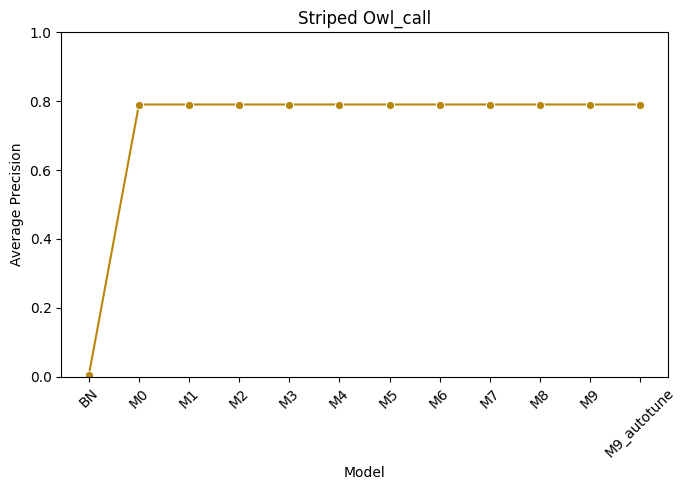

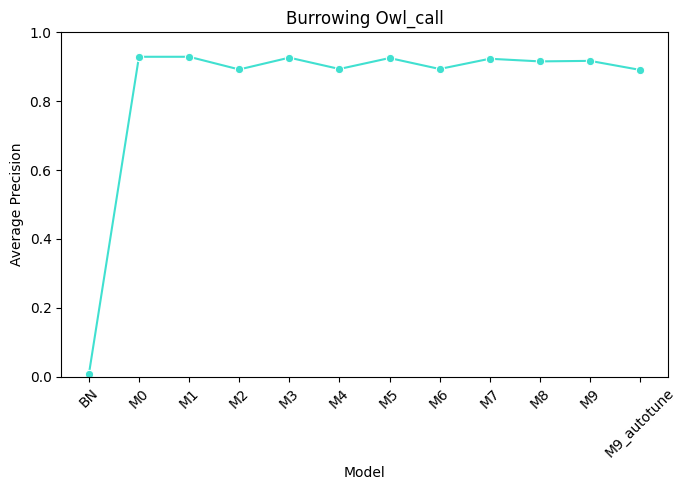

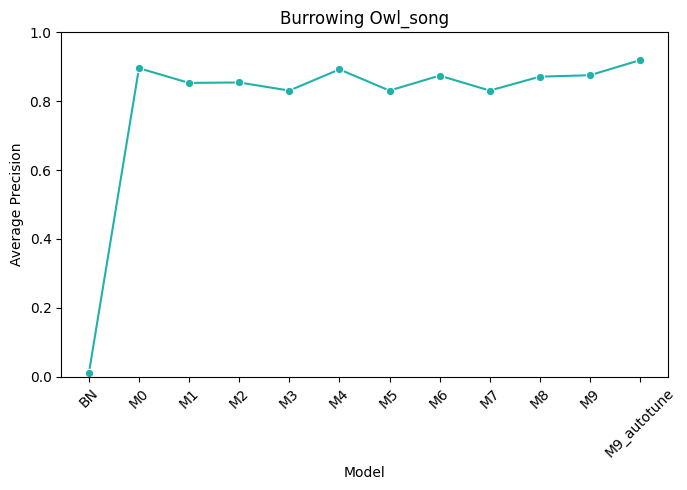

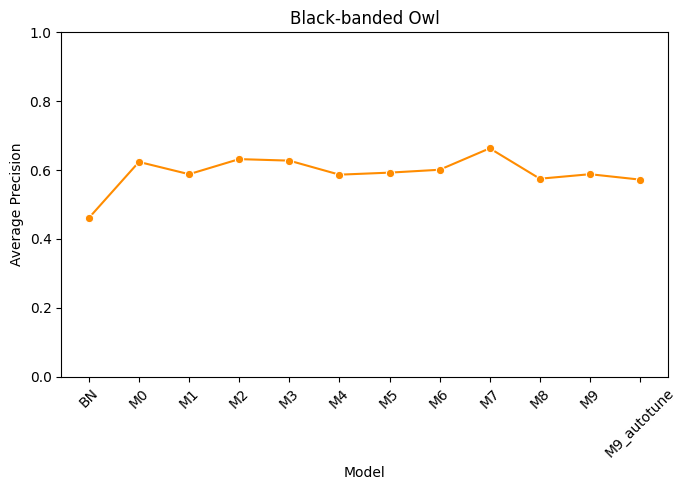

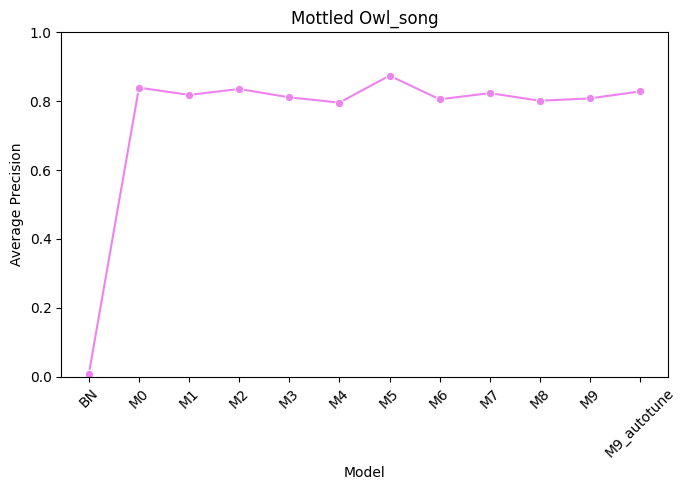

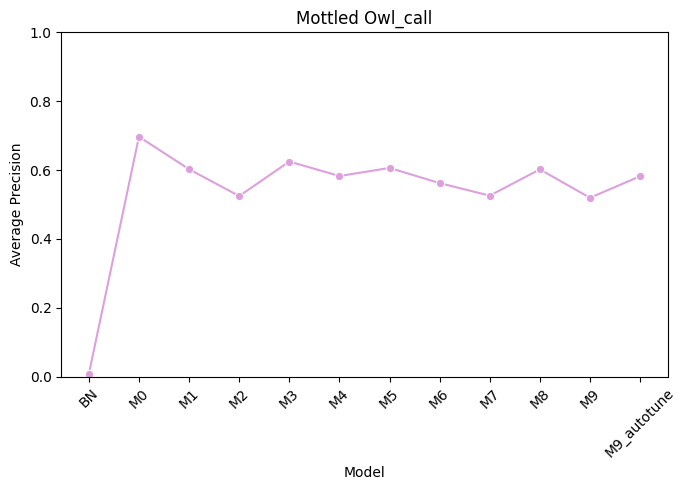

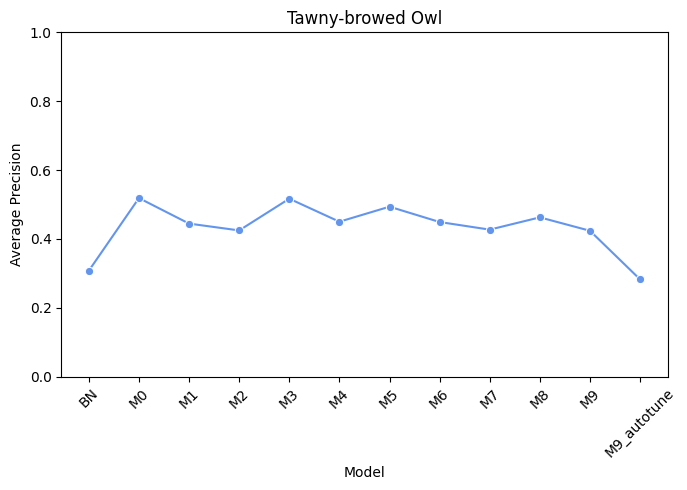

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each owl class and create a plot
for owl_class in ap_long['class'].unique():
    subset = ap_long[ap_long['class'] == owl_class]
    
    plt.figure(figsize=(7, 5))
    sns.lineplot(data=subset,
                 x='model',
                 y='AP',
                 marker='o',
                 color=color[owl_class]
                )
    
    plt.title(f'{owl_class}')
    plt.ylim(0, 1)
    plt.ylabel('Average Precision')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
